In [1]:
import pandas as pd
#import numpy as np
#from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#import statsmodels.api as sm
#from patsy import dmatrices
#from sklearn.preprocessing import LabelEncoder

In [20]:
csvfilename = "../data/notes_all.csv"
df = pd.read_csv(csvfilename)
df = df.drop(columns=["NOM"])
df = df.dropna()
df["CONTC"] = (
    (df["TP2"] + df["TP3"] + df["TP4"] + df["TP5"] + df["TP6"] + df["TP7"]) / 6
).round(1)
# df.head()

In [21]:
sns.set_theme(style="whitegrid")

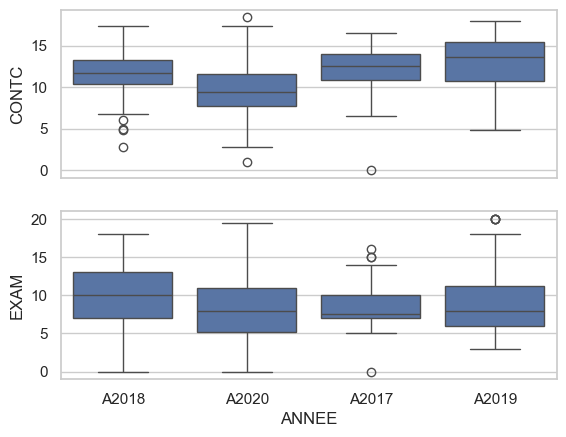

In [22]:
# sns.set_theme()
# define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 1, sharex=True)

# create chart in each subplot
# sns.displot(penguins, x="flipper_length_mm", kind="kde")
sns.boxplot(data=df, x="ANNEE", y="CONTC", ax=axes[0])
ax = sns.boxplot(data=df, x="ANNEE", y="EXAM", ax=axes[1])
plt.show()

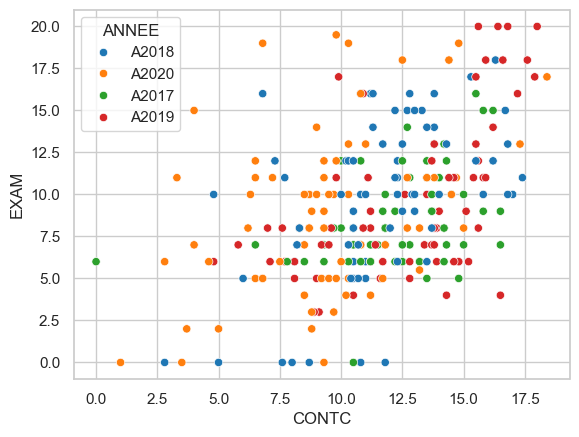

In [23]:
ax = sns.scatterplot(data=df, x="CONTC", y="EXAM", hue="ANNEE", palette="tab10")
plt.show()

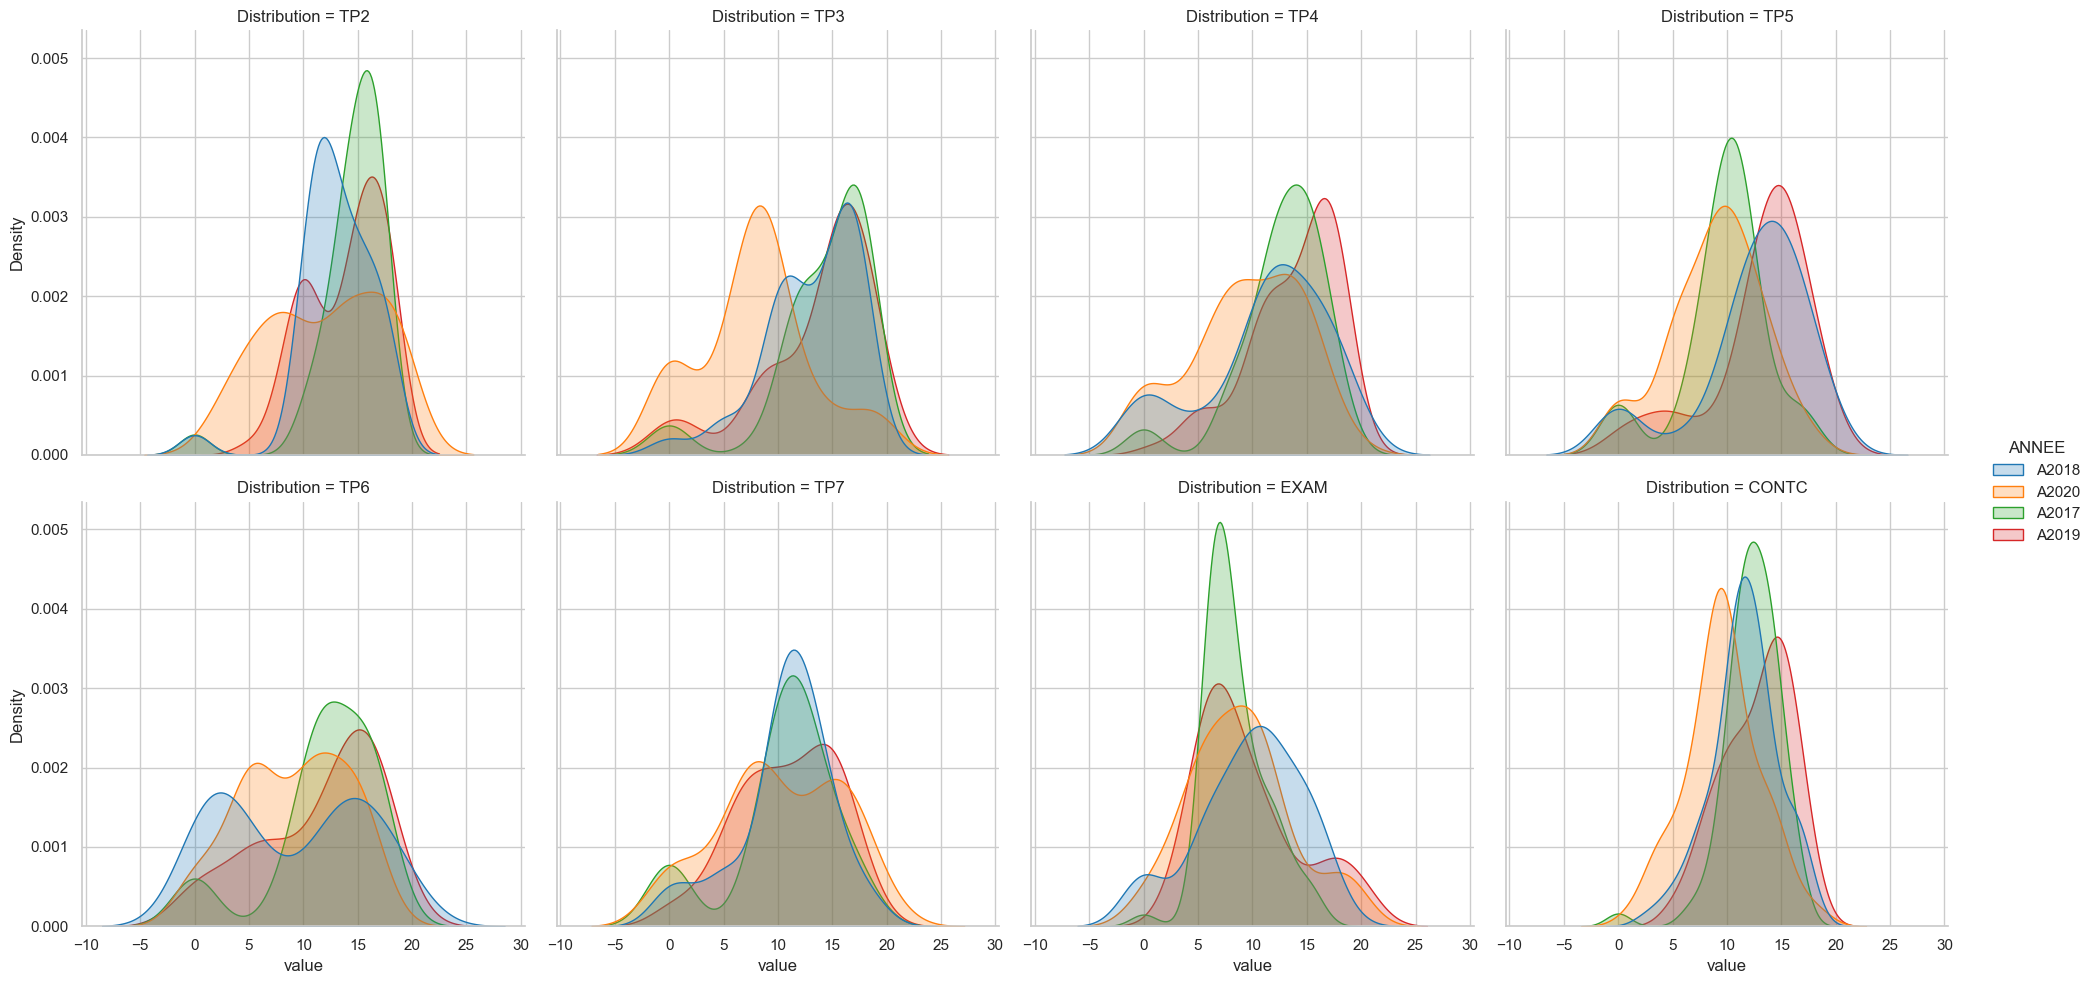

In [24]:
# convert the dataframe from wide to long
dfm = df.melt(id_vars="ANNEE", var_name="Distribution")
# plot
x_ = sns.displot(
    kind="kde",
    data=dfm,
    col="Distribution",
    col_wrap=4,
    x="value",
    hue="ANNEE",
    fill=True,
    facet_kws={"sharey": True, "sharex": True},
    warn_singular=False,
    palette="tab10",
)
plt.show()

In [25]:
xdf = pd.DataFrame(df, columns=["TP2", "TP3", "TP4", "TP5", "TP6", "TP7", "EXAM"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(xdf)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_features)
PC_scores = pd.DataFrame(principalComponents, columns=["PC1", "PC2", "PC3"])
PC_scores.index = xdf.index
df = pd.merge(df, PC_scores, left_index=True, right_index=True)
varsnames = xdf.columns
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2", "PC3"], index=varsnames)
PC1 = pca.fit_transform(scaled_features)[:, 0]
PC2 = pca.fit_transform(scaled_features)[:, 1]
PC3 = pca.fit_transform(scaled_features)[:, 2]
df["PC1"] = PC1.round(2)
df["PC2"] = PC2.round(2)
df["PC3"] = PC3.round(2)
ldngs = pca.components_
scalePC1 = 1.0 / (PC1.max() - PC1.min())
scalePC2 = 1.0 / (PC2.max() - PC2.min())
scalePC3 = 1.0 / (PC3.max() - PC3.min())
label_groups = df["ANNEE"].astype(str)

d:\miniconda3\envs\infoenv\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


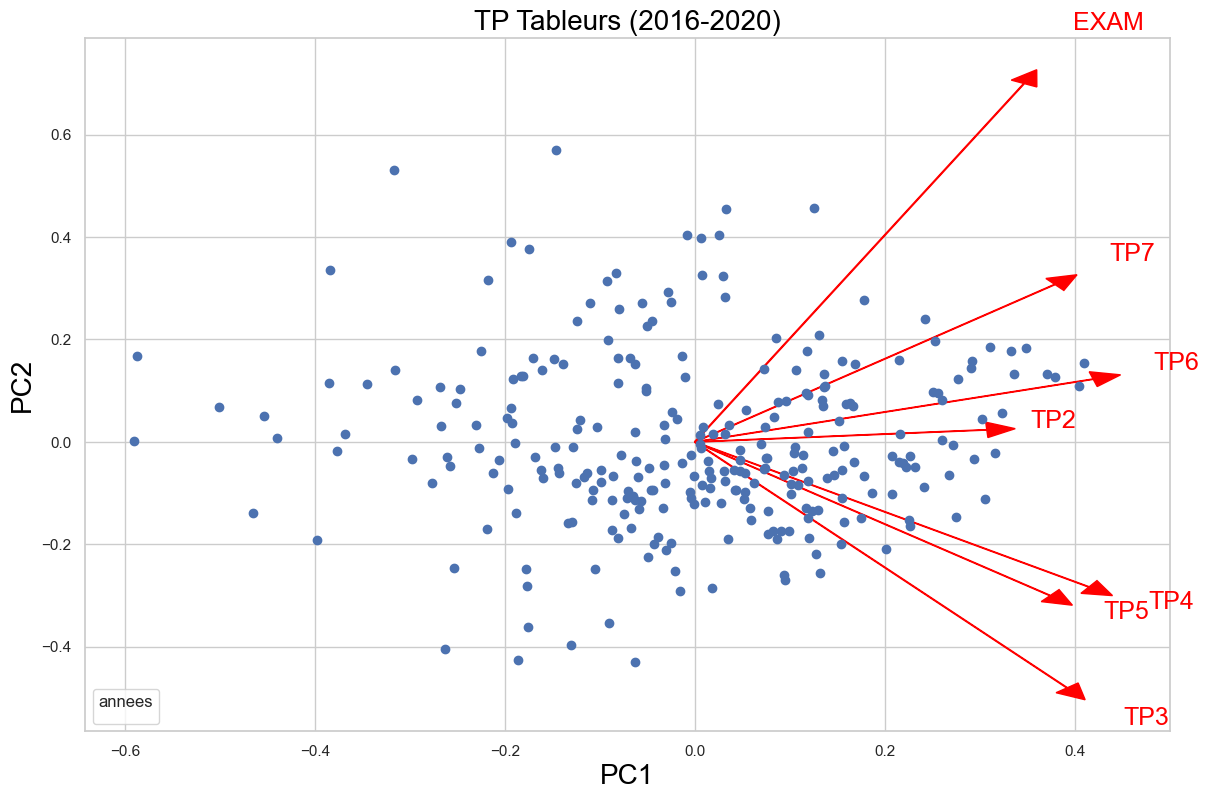

In [26]:
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(varsnames):
    ax.arrow(
        0, 0, ldngs[0, i], ldngs[1, i], head_width=0.03, head_length=0.03, color="red"
    )
    ax.text(ldngs[0, i] * 1.15, ldngs[1, i] * 1.15, feature, color="red", fontsize=18)
scatter = ax.scatter(PC1 * scalePC1, PC2 * scalePC2)
ax.set_xlabel("PC1", fontsize=20, color="black")
ax.set_ylabel("PC2", fontsize=20, color="black")
ax.set_title("TP Tableurs (2016-2020)", fontsize=20, color="black")

x_ = ax.legend(*scatter.legend_elements(), loc="lower left", title="annees")
plt.show()

d:\miniconda3\envs\infoenv\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


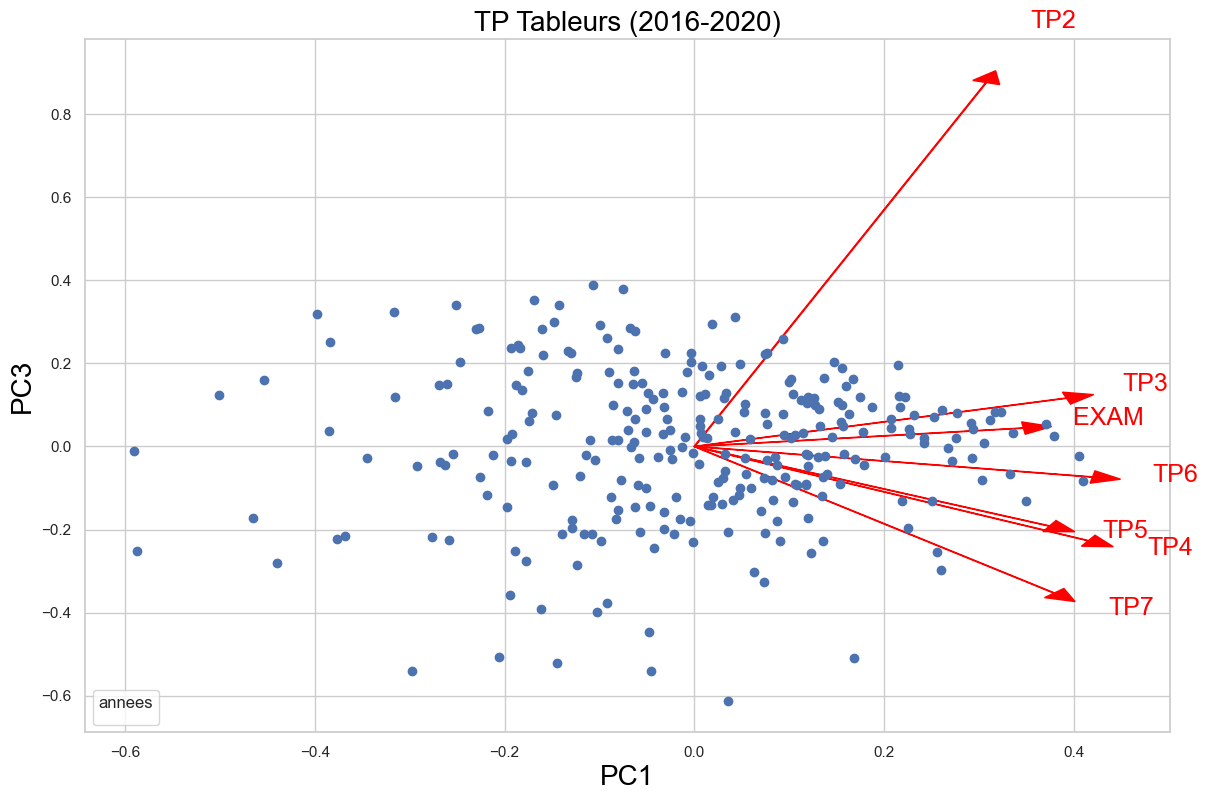

In [27]:
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(varsnames):
    ax.arrow(
        0, 0, ldngs[0, i], ldngs[2, i], head_width=0.03, head_length=0.03, color="red"
    )
    ax.text(ldngs[0, i] * 1.15, ldngs[2, i] * 1.15, feature, color="red", fontsize=18)
scatter = ax.scatter(PC1 * scalePC1, PC3 * scalePC3)
ax.set_xlabel("PC1", fontsize=20, color="black")
ax.set_ylabel("PC3", fontsize=20, color="black")
ax.set_title("TP Tableurs (2016-2020)", fontsize=20, color="black")

x_ = ax.legend(*scatter.legend_elements(), loc="lower left", title="annees")
plt.show()

d:\miniconda3\envs\infoenv\Lib\site-packages\matplotlib\collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


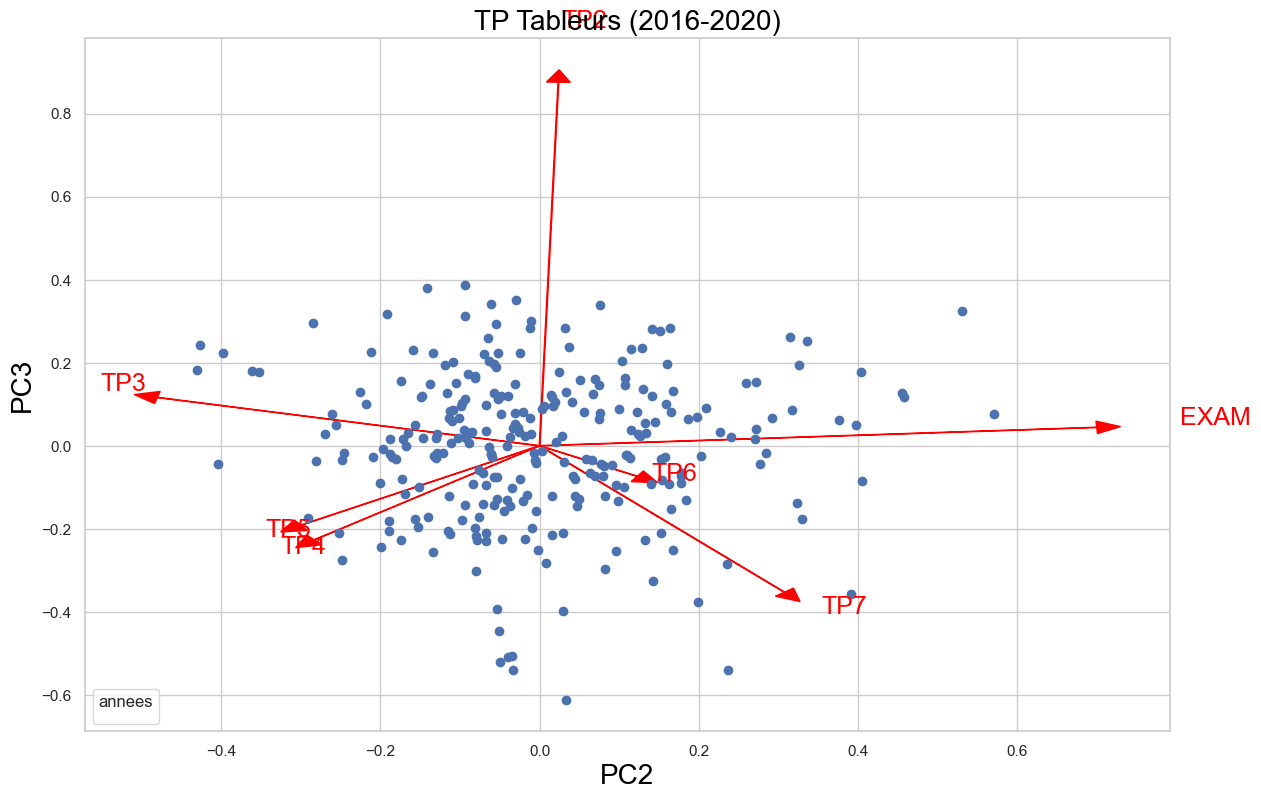

In [28]:
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(varsnames):
    ax.arrow(
        0, 0, ldngs[1, i], ldngs[2, i], head_width=0.03, head_length=0.03, color="red"
    )
    ax.text(ldngs[1, i] * 1.15, ldngs[2, i] * 1.15, feature, color="red", fontsize=18)
scatter = ax.scatter(PC2 * scalePC2, PC3 * scalePC3)
ax.set_xlabel("PC2", fontsize=20, color="black")
ax.set_ylabel("PC3", fontsize=20, color="black")
ax.set_title("TP Tableurs (2016-2020)", fontsize=20, color="black")

x_ = ax.legend(*scatter.legend_elements(), loc="lower left", title="annees")
plt.show()